<a href="https://colab.research.google.com/github/dimeking/playground/blob/master/Covid_Rt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random

colors = list(mcolors.TABLEAU_COLORS.keys())


In [0]:
def get_datafile():
  file_name = 'https://d14wlfuexuxgcm.cloudfront.net/covid/rt.csv'
  df = pd.read_csv(file_name)
  return df
  

In [7]:
df = get_datafile()
df.head()

,state,date,ML,Low_90,High_90,Low_50,High_50
0,AK,2020-03-05,1.266347,0.820046,1.774610,0.984562,1.305569
1,AK,2020-03-06,1.269212,0.829444,1.835965,1.036529,1.353932
2,AK,2020-03-07,1.263659,0.783479,1.802591,0.966317,1.290000
3,AK,2020-03-08,1.255883,0.793160,1.816380,0.960311,1.288482
4,AK,2020-03-09,1.252235,0.796725,1.761468,1.020136,1.338477


In [107]:
states = df['state'].unique()
df[df['state']=='CA'].tail(7)

# print('last day:')
# df.groupby('state').tail(1).loc[:,['state','ML']]

# print('last week:')
# df.groupby('state').tail(7)

# print('last week mean:')
# df.groupby('state').tail(7).groupby('state').mean()['ML']



,state,date,ML,Low_90,High_90,Low_50,High_50
238,CA,2020-04-16,1.129130,1.010490,1.272996,1.052497,1.150670
239,CA,2020-04-17,1.140142,1.008013,1.285037,1.057514,1.161325
240,CA,2020-04-18,1.156326,1.005541,1.309416,1.062120,1.176978
241,CA,2020-04-19,1.174257,1.019630,1.359000,1.064339,1.187947
242,CA,2020-04-20,1.188082,1.009655,1.382926,1.078088,1.215553
243,CA,2020-04-21,1.187268,0.987113,1.386566,1.060782,1.210439
244,CA,2020-04-22,1.185008,0.982151,1.410682,1.045391,1.204119


In [0]:
def rolling_mean(datafile, size, cols):
  grouper = datafile.groupby('state').rolling(window=size).mean()[cols]
  df_ML_SMA =  grouper.to_frame(name = 'ML_SMA').reset_index().drop('level_1', axis=1)
  df_ML_SMA['date'] = datafile['date']
  df_ML_SMA['ML'] = datafile['ML']
  return df_ML_SMA


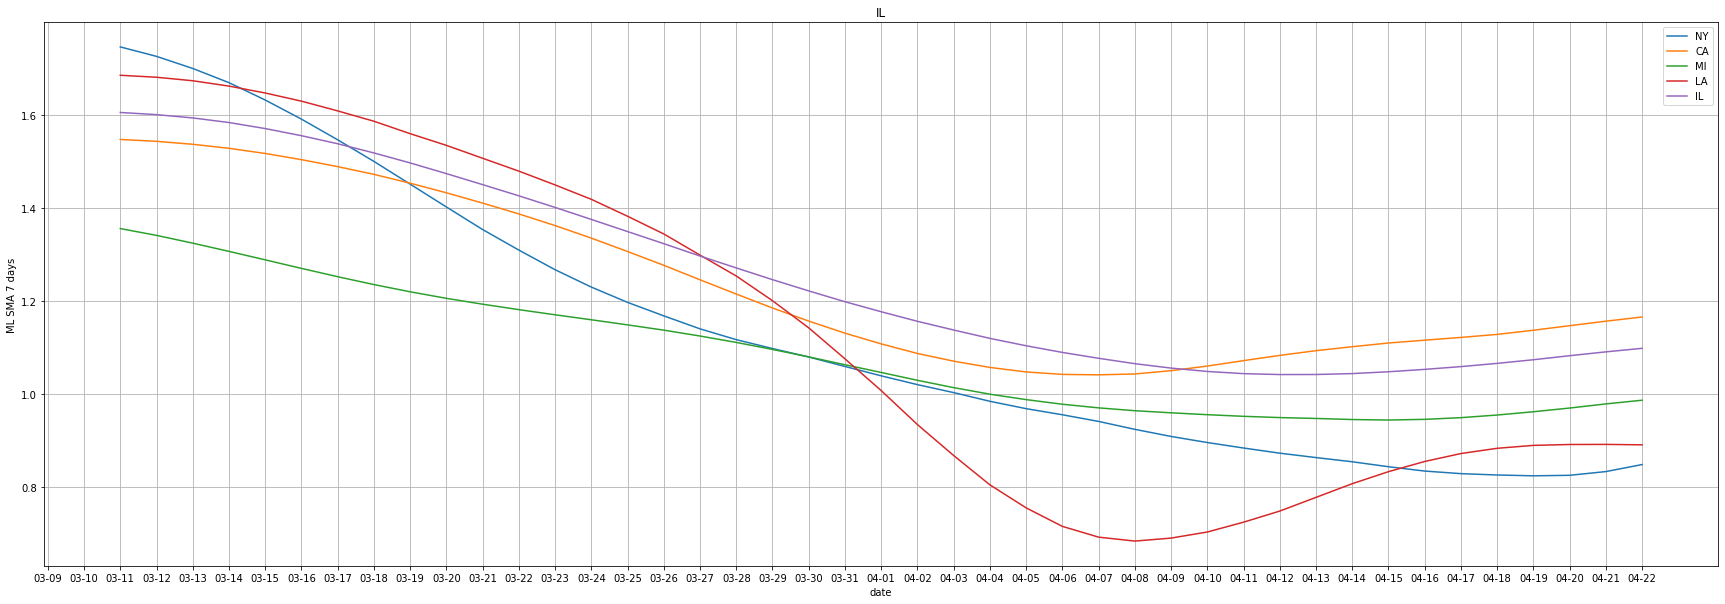

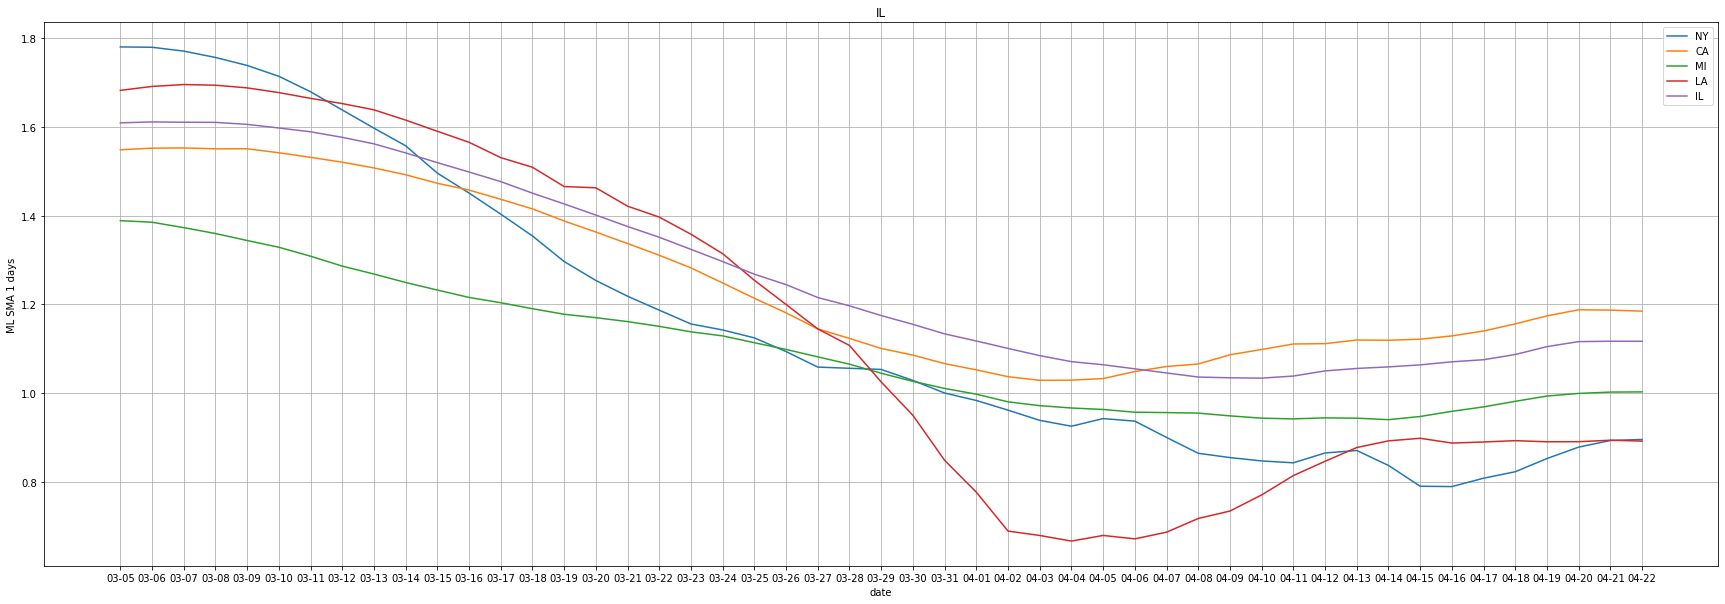

In [151]:
def plot_rolling_mean(datafile, days):
  plt.figure(figsize=[30,10])
  plt.grid(True)

  df_ML_SMA = rolling_mean(datafile, days, 'ML')
  # df_ML_SMA_7.groupby('state').tail(1)

  states = ['NY', 'CA', 'MI', 'LA', 'IL']
  for state in states:
    df_ML_SMA_state = df_ML_SMA[df_ML_SMA['state']==state]
    plt.plot(df_ML_SMA_state['date'].str[-5:], df_ML_SMA_state['ML_SMA'], label=state)


  plt.xlabel('date')
  plt.ylabel('ML SMA '+str(days)+' days')
  # plt.ylabel('R-value')
  plt.title(state)
  plt.legend(loc=1)

# plot_rolling_mean(df, 14)
plot_rolling_mean(df, 7)
plot_rolling_mean(df, 1)
